### Name - Sandeep N. Mutkule
## Task - Prediction using Supervised ML
### Predict the percentage of an student based on the no. of study hours
### Q. What will be predicted score if a student studies for 9.25 hrs/ day? 


In [4]:
# First load all required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load the data set

In [6]:
df = pd.read_csv('C:/Users/LENOVO/mentorboxxML/TSF/TSF_Tasks1/pred_ML.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [7]:
df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(None,
            Hours     Scores
 count  25.000000  25.000000
 mean    5.012000  51.480000
 std     2.525094  25.286887
 min     1.100000  17.000000
 25%     2.700000  30.000000
 50%     4.800000  47.000000
 75%     7.400000  75.000000
 max     9.200000  95.000000)

### Looking for an outliers using boxplot

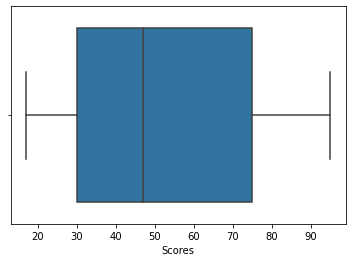

In [8]:
import seaborn as sns
ax = sns.boxplot(x=df["Scores"])

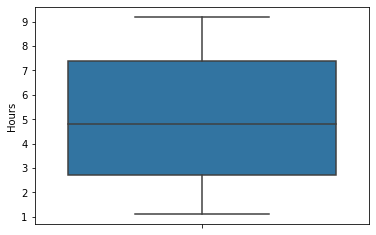

In [9]:
ax = sns.boxplot(y=df["Hours"])

### Finding correlation

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Scatter plot of the data

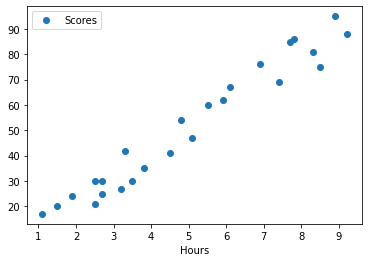

In [11]:
df.plot(x='Hours', y='Scores', style='o')   
plt.show()

### Assigning the Dependent and Independent variables
#### Here x (Hours) is our independent variable and y (Scores) is our dependent variable

In [12]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Split the data set into train and test data 

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0) 

### Train the model

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train,y_train)

### Loolking for the slope and intercept

In [15]:
lm.coef_,lm.intercept_

(array([9.91065648]), 2.018160041434683)

### Predict the values for test data set

In [16]:
y_pred = lm.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

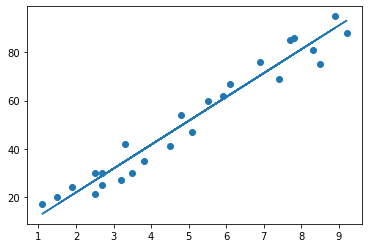

In [17]:
# Plotting the regression line
line = lm.coef_*x + lm.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

#### Error term

In [18]:
y_error = y_test - y_pred
y_error

array([ 3.11585524, -6.73226078, -6.357018  ,  3.20519876,  1.50896672])

In [19]:
# coef_determination
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356

### Comparision of the Actual and Predicted values

In [20]:
# Comparing Actual vs Predicted
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### The final task is to predict the score percentage for the 9.25Hrs study

In [21]:
hours = np.array(9.25).reshape((-1, 1))
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


#### From the results we can ay that if student studies for 9.25 hrs., he will scores 93.69%.